<a href="https://colab.research.google.com/github/Patrick-Sinnott/Open-Quantum-Systems---Python-Assignments/blob/main/Worksheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth 10 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Comment* your code to explain what each part does. I cannot award marks if I do not understand what you are trying to do. Conversely, you will gain marks for well-commented code even if it does not solve the problem.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

1. In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

    (a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that
    
    $$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$
    
    [Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

    (b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the lecture notes. Explicitly verify the anti-commutation relation
    
$$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$
    
for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
commutation and anti-commutation relations (or otherwise), verify the identity:
    
$$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  
    
where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.
    
(c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that
    
$$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$
    
Use this result to show that, in general,
    
$$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$
    
(d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:
    
$$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$
    
(e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

Text(0, 0.5, '<$\\sigma_z$>')

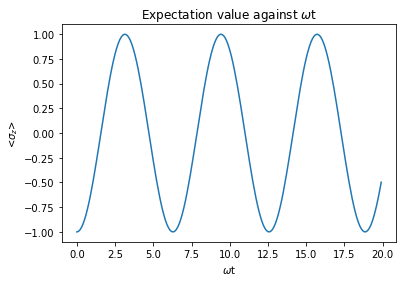

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,20,.1)
y = -np.cos(x)

plt.plot(x,y)
plt.title('Expectation value against $\omega$t')
plt.xlabel('$\omega$t') 
plt.ylabel('<$\sigma_z$>')

2. Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 
    
    (a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [ ]:
hbarw = 0.2;
u = [[1/np.sqrt(2)],[1/np.sqrt(2)],[0]]

's1,s2,s3 are our Pauli matrices'
s = [[],[],[]]
s[0] = np.array([[0,1],[1,0]])
s[1] = np.array([[0,-1j],[1j,0]])
s[2] = np.array([[1,0],[0,-1]])

'We can now define our Hamiltonian'

Ham = (hbarw/2) *(s[0]+s[1])/(.5**-.5)


print('H^2 = ',Ham@Ham,'\n')
print('This is equal to The given expression')


H^2 =  [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]] 

This is equal to The given expression


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [ ]:
phi0 = [[0],[1]]

print(np.matmul(Ham,phi0), '\n')

print('We  can clearly see that no eigenvalue can multiply \n with the given initial state to give this value of  H \u03C8 \n')

Eigs = np.linalg.eig(Ham)

print('eigenvalues = ', Eigs[0],'\n')
print('eigenvectors = ', Eigs[1])


[[0.07071068-0.07071068j]
 [0.        +0.j        ]] 

We  can clearly see that no eigenvalue can multiply 
 with the given initial state to give this value of  H ψ 

eigenvalues =  [ 0.1+0.j -0.1+0.j] 

eigenvectors =  [[ 0.5       -0.5j  0.70710678+0.j ]
 [ 0.70710678+0.j  -0.5       -0.5j]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [ ]:
from scipy import linalg

'It will be useful to define our evolution operator'

def Exponent(dt,H):
  return (-1j*H*dt)

def U(x): 
  return linalg.expm(x)

print('U = ',U(Exponent(0.05,Ham)),'\n')

print('To prove U is unitary we need to prove that its inverse is equal to its adjoint \n')

print('U^-1 = ', linalg.inv(U(Exponent(0.05,Ham))),'\n')

print('U* = ' , np.transpose(np.conjugate(U(Exponent(0.05,Ham)))),'\n','\n','We can see that this is the case')



U =  [[ 0.9999875 +0.j         -0.00353552-0.00353552j]
 [ 0.00353552-0.00353552j  0.9999875 +0.j        ]] 

To prove U is unitary we need to prove that its inverse is equal to its adjoint 

U^-1 =  [[ 0.9999875 -0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 -0.j        ]] 

U* =  [[ 0.9999875 -0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 -0.j        ]] 
 
 We can see that this is the case


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

Text(0, 0.5, '<$\\sigma_z$>')

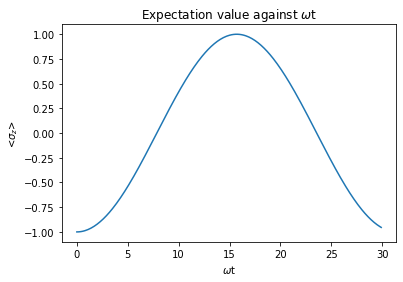

In [ ]:
'We define our initial state phi'
phi = np.array([[0],[1]])

t = 0
i = 0
dt = .1

x1 = np.zeros(300)

Evalue = np.zeros(300)

while i < 300:
  'We can map all of our expectation values at different times to a numpy array'
  Evalue[i] = np.real(np.transpose(np.conjugate(phi))@s[2]@phi)
  'We can evolve our state phi using our Time Evolution operator from above'
  phi = U(Exponent(dt,Ham))@phi
  x1[i] = t
  t = t + dt
  i +=1
 
  
 
plt.plot(x1, Evalue)
plt.title('Expectation value against $\omega$t')
plt.xlabel('$\omega$t') 
plt.ylabel('<$\sigma_z$>')




3. Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

    (a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation
	
    $$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$
    
    where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.
    
    (b) Show that the same equation can be expressed in the form
    
    $$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$
    
    and find an explicit expression for the matrix $\mathbf{M}$.
    
    (c) Convince yourself that the explicit solution of the above equation is 
    
    $$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$
    
    Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

In [ ]:
u = (2**-0.5)* np.transpose(np.array([[1,1,0]]))

M = np.array([[0,-u[2,0],u[1,0]],[u[2,0],0,-u[0,0]],[-u[1,0],u[0,0],0]])

S = np.zeros((3,1))
x = np.zeros((3,300))
y = np.zeros((3,300))
phi = np.array([[0],[1]], dtype=float)
dt= .1

for k in range(0,3):
  S[k] = np.array(np.real(np.transpose(np.conjugate(phi))@s[k]@phi))
  
t = 0
i = 0
while i < 300:
  for k in range(0,3):
    x[k][i] = t
    y[k][i] = S[k]
  S = linalg.expm(M*dt)@S
  t = t + dt
  i +=1

label = ['x','y','z']

for k in range(0,3):
  plt.plot(x[k],y[k], label = '$s_%c$'%label[k])
  
plt.title('Expectation value against $\omega$t')
plt.xlabel('$\omega$t') 
plt.ylabel('<$\sigma$>')
plt.legend()




NameError: ignored

4. Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

Text(0, 0.5, '$\\delta$$\\sigma_z$')

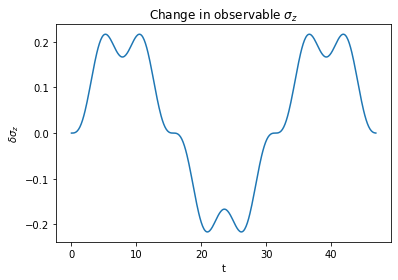

In [ ]:
OmegaD = 0.2
Omega = 0.1
t = np.arange(0,47,.1)

def delta(t):
  return (2*Omega*(np.sin(OmegaD*t)-OmegaD*np.sin(t))/(1-OmegaD**2))
  



plt.plot(t,delta(t))
plt.title('Change in observable $\sigma_z$')
plt.xlabel('t')
plt.ylabel('$\delta$$\sigma_z$')

5. A driven two-level system is described in the interaction picture by the Hamiltonian

$$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

6. Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

    $$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$
    
    For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is
    
    $$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$
    
    where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that
    
    $$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      
   
    Now specialise to a driven qubit with Hamiltonian
    
$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

For these plots, the RWA is a very reasonable approximation 
 as the neglected terms are very small compared to our values


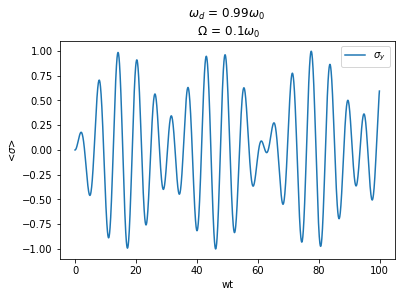

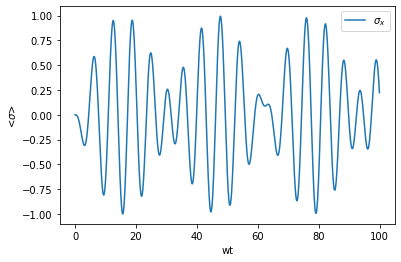

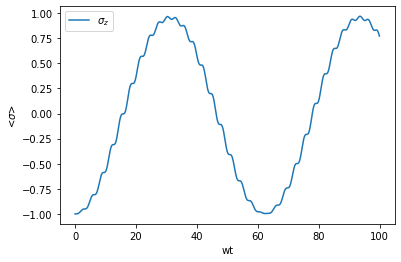

In [ ]:
t = 0
def Ham2(t):
 return np.array([[1/2,0.1*np.sin(0.99*t)],[0.1*np.sin(0.99*t),-1/2]])

t = 0
dt = 0.05
phi = np.array([[0],[1]])
x = np.zeros((3,2000))
y = np.zeros((3,2000))
Evalue = np.zeros(4)
for k in range(0,3):
  i=0 
  t=0
  phi = np.array([[0],[1]])
  while i < 2000:
    phi = U(Exponent(dt,Ham2(t)))@phi
    Evalue[k] = np.real(phi.T.conj()@s[k]@phi)
    x[k][i] = t
    y[k][i] = Evalue[k]
    t += 0.05
    i += 1
    
plt.title('$\omega_d$ = 0.99$\omega_0$ \n $\Omega$ = 0.1$\omega_0$')
for k in range(0,3):
   plt.figure(k)
   plt.plot(x[k],y[k],label = '$\sigma_%c$'%label[k])
   plt.legend()
   plt.xlabel('wt')
   plt.ylabel('<$\sigma$>')
  
print('For these plots, the RWA is a very reasonable approximation \n as the neglected terms are very small compared to our values')

For these plots, the RWA is less valid 
 as the oscillatory terms are much larger


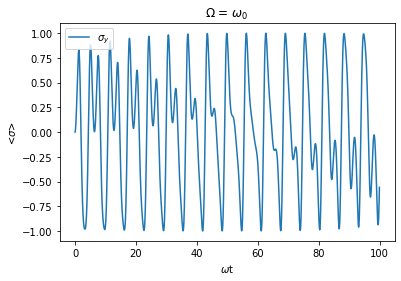

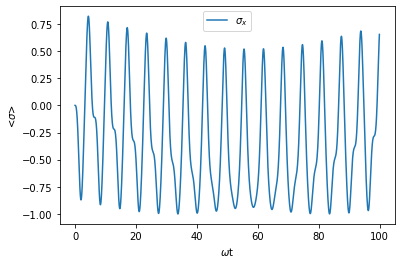

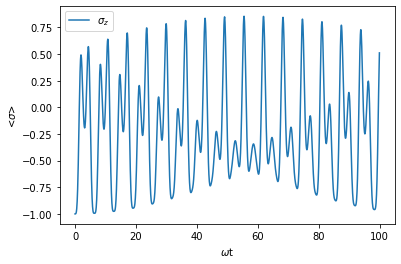

In [ ]:
t = 0
def Ham2(t):
 return np.array([[1/2,np.sin(0.99*t)],[np.sin(0.99*t),-1/2]])

t = 0
dt = 0.05
phi = np.array([[0],[1]])
x = np.zeros((3,2000))
y = np.zeros((3,2000))
Evalue = np.zeros(4)
for k in range(0,3):
  i=0 
  t=0
  phi = np.array([[0],[1]])
  while i < 2000:
    phi = U(Exponent(dt,Ham2(t)))@phi
    Evalue[k] = np.real(phi.T.conj()@s[k]@phi)
    x[k][i] = t
    y[k][i] = Evalue[k]
    t += 0.05
    i += 1
    
plt.title('$\Omega$ = $\omega_0$')
for k in range(0,3):
   plt.figure(k)
   plt.plot(x[k],y[k],label = '$\sigma_%c$'%label[k])
   plt.legend()
   plt.xlabel('$\omega$t')
   plt.ylabel('<$\sigma$>')

print('For these plots, the RWA is less valid \n as the oscillatory terms are much larger')

7. Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

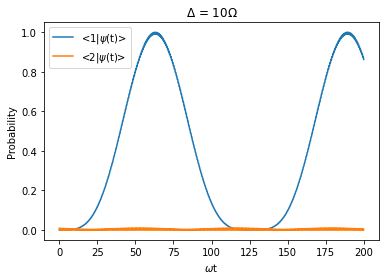

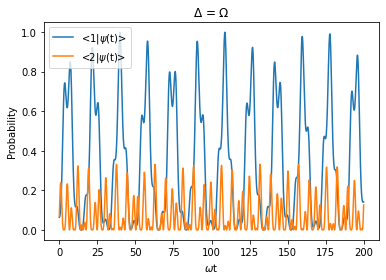

In [ ]:
omega=1
d = np.array([10,1])
def Ham3(delta): 
  return np.array([[0,0,omega/2],[0,0,omega/2],[omega/2,omega/2,delta]])

k = 0
t = 0
dt = .1
phi = [[],[],[]]
phi[0] = np.array([[1],[0],[0]])
phi[1] = np.array([[0],[1],[0]])
phi[2] = np.array([[0],[0],[1]])
x = np.zeros((2,3,2000))
y = np.zeros((2,3,2000))

for b in range(0,2):
  i = 0
  t = 0
  for k in range(1,3):
    i = 0
    t = 0
    while i < 2000:
      phi[0] = U(Exponent(dt,Ham3(d[b])))@phi[0]
      Evalue = np.real(phi[k].T@phi[0])**2
      x[b][k][i] = t
      y[b][k][i] = Evalue
      t += .1
      i += 1


for k in range(1,3):
  plt.plot(x[0][k],y[0][k],label = '<%c|$\psi$(t)>'%str(k))
  plt.title('$\Delta$ = 10$\Omega$')
  plt.legend()
  plt.xlabel('$\omega$t')
  plt.ylabel('Probability')

print('')

plt.figure()
for k in range(1,3):
  plt.plot(x[1][k],y[1][k],label = '<%c|$\psi$(t)>'%str(k))
  plt.legend()
  plt.title('$\Delta$ = $\Omega$')
  plt.xlabel('$\omega$t')
  plt.ylabel('Probability')

8. (a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [ ]:
I2 = np.eye(2)
hwa = 1. 
hwb = 0.5
hJ = 0.5
hV = 0.1

Ham4 = (-hwa*np.kron(s[2],I2))*.5 - hwb*np.kron(I2,s[2]) + .25*hJ*(np.kron(s[0],s[0]) + np.kron(s[1],s[1])) + hV*np.kron(s[2],s[2])

print('H = ',Ham4, '\n')

Eigs = np.linalg.eig(Ham4)

print('eigenvalues = ', Eigs[0],'\n')
print('eigenvectors = ', Eigs[1],'\n')

grndstate = Eigs[1][np.where( Eigs[0] == Eigs[0].min())].flatten()

ZeroOneState = np.kron(np.array([[0],[1]]),np.array([[1],[0]]))

overlap = grndstate.T.conj()@ZeroOneState

print('Our overlap = ',overlap)





H =  [[-0.9 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.1 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j -0.1 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  1.1 +0.j]] 

eigenvalues =  [ 0.15+0.j -0.35+0.j -0.9 +0.j  1.1 +0.j] 

eigenvectors =  [[-0.        -0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678-0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [-0.        -0.j  0.        +0.j  0.        +0.j  1.        +0.j]] 

Our overlap =  [0.+0.j]


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

[[0]
 [0]
 [1]
 [0]]


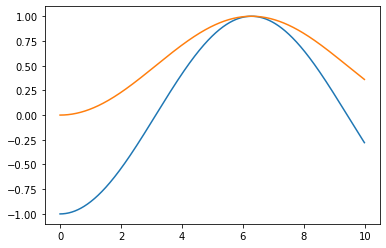

In [ ]:
sigmaz_tensor_one = np.kron(s[2],I2)
phi = np.kron(np.array([[0],[1]]),np.array([[1],[0]]))
print(phi)
wt = np.arange(0,10,0.01)
Evalue = np.zeros(1000)

for i in range(1000):
  Evalue[i] = np.real(phi.T.conj()@sigmaz_tensor_one@phi)
  phi = U(-1j*Ham4*0.01)@phi

plt.plot(wt,Evalue)

phi = (2**-.5)*np.kron(np.array([[1],[1]]),np.array([[1],[0]]))
Evalue_two = np.zeros(1000)

for i in range(1000):
  Evalue_two[i] = np.real(phi.T.conj()@sigmaz_tensor_one@phi)
  phi = U(-1j*Ham4*0.01)@phi

plt.plot(wt,Evalue_two)

(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [ ]:
sigmaz = [[np.kron(s[2],I2)],[np.kron(I2,s[2])]]
sigmax = [[np.kron(s[0],I2)],[np.kron(I2,s[0])]]
sigmay = [[np.kron(s[1],I2)],[np.kron(I2,s[1])]]

Ham5 = (.5)*(-hwa*sigmaz[0] - hwb*sigmaz[1] + (.5)*hJ*(sigmax[0]@sigmax[0] + sigmay[0]@sigmay[1]) + hV*sigmaz[0]@sigmaz[1])

print(H)

TypeError: ignored

(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 